<a href="https://colab.research.google.com/github/Kursat1907/Yarat-c-dusunme/blob/main/Yarat%C4%B1c%C4%B1dusunmei_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_json("hf://datasets/Juliankrg/Thinking_DataSet_300k/thinking_dataset_300k.json")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df=pd.DataFrame(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   prompt      300000 non-null  object
 1   completion  300000 non-null  object
dtypes: object(2)
memory usage: 4.6+ MB


In [ ]:
df_sozler1=pd.concat([df["completion"]],axis=1)

In [ ]:
df_sozler1

,completion
0,Critical thinking is the analysis and evaluati...
1,Questioning assumptions helps in identifying u...
2,Critical thinking is the analysis and evaluati...
3,Questioning assumptions helps in identifying u...
4,"To solve a complex problem, break it down into..."
...,...
299995,Evidence supports or refutes claims and is cru...
299996,"To solve a complex problem, break it down into..."
299997,"To solve a complex problem, break it down into..."
299998,"To solve a complex problem, break it down into..."


In [ ]:
# %%
df_sozler=df["completion"]
# %%
df_sozler.info()
# %%
# Assuming the goal is to add a new column 'Sozler' to the original DataFrame 'df'
# with the lowercase values of the 'completion' column.
df_sozler1["Sozler"] = df_sozler1["completion"].str.lower()

<class 'pandas.core.series.Series'>
RangeIndex: 300000 entries, 0 to 299999
Series name: completion
Non-Null Count   Dtype 
--------------   ----- 
300000 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [ ]:
df_sozler1

,completion,Sozler
0,Critical thinking is the analysis and evaluati...,critical thinking is the analysis and evaluati...
1,Questioning assumptions helps in identifying u...,questioning assumptions helps in identifying u...
2,Critical thinking is the analysis and evaluati...,critical thinking is the analysis and evaluati...
3,Questioning assumptions helps in identifying u...,questioning assumptions helps in identifying u...
4,"To solve a complex problem, break it down into...","to solve a complex problem, break it down into..."
...,...,...
299995,Evidence supports or refutes claims and is cru...,evidence supports or refutes claims and is cru...
299996,"To solve a complex problem, break it down into...","to solve a complex problem, break it down into..."
299997,"To solve a complex problem, break it down into...","to solve a complex problem, break it down into..."
299998,"To solve a complex problem, break it down into...","to solve a complex problem, break it down into..."


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

stopwords_1=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_sozler1["temızlenen_kelıme"]=df_sozler1["Sozler"].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_1)]))

In [ ]:
import re

df_sozler1["temızlenen_kelıme1"] = df_sozler1.apply(lambda x: re.sub(r"[*]","star",x["temızlenen_kelıme"]),axis=1)

In [ ]:
df_sozler1.head()

,completion,Sozler,temızlenen_kelıme,temızlenen_kelıme1
0,Critical thinking is the analysis and evaluati...,critical thinking is the analysis and evaluati...,critical thinking analysis evaluation informat...,critical thinking analysis evaluation informat...
1,Questioning assumptions helps in identifying u...,questioning assumptions helps in identifying u...,questioning assumptions helps identifying unde...,questioning assumptions helps identifying unde...
2,Critical thinking is the analysis and evaluati...,critical thinking is the analysis and evaluati...,critical thinking analysis evaluation informat...,critical thinking analysis evaluation informat...
3,Questioning assumptions helps in identifying u...,questioning assumptions helps in identifying u...,questioning assumptions helps identifying unde...,questioning assumptions helps identifying unde...
4,"To solve a complex problem, break it down into...","to solve a complex problem, break it down into...","solve complex problem, break smaller parts, an...","solve complex problem, break smaller parts, an..."


In [ ]:
df_sozler1["temızlenen_kelıme2"] = df_sozler1.apply(lambda x: re.sub(r"([^\w\s])","",x["temızlenen_kelıme1"]),axis=1)

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df_sozler1["Token"] =df_sozler1.apply(lambda x: word_tokenize(x["temızlenen_kelıme2"]),axis=1)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df_sozler1["STEM"]=df_sozler1["Token"].apply(lambda tokens : [ps.stem(token) for token in tokens])

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download("wordnet")
# Create an instance of WordNetLemmatizer
lm=WordNetLemmatizer()
df_sozler1["Lemma"]=df_sozler1["STEM"].apply(lambda tokens : [lm.lemmatize(token) for token in tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
fluency_keywords = [
    "first", "second", "third", "next", "then", "finally", "after", "before", "following", "subsequently", "eventually",
    "also", "additionally", "moreover", "too", "besides", "furthermore", "another", "again", "repeatedly", "continue",
    "multiple", "several", "many", "numerous", "various", "plenty", "abundant", "countless", "diverse", "extra",
    "overflow", "stream", "series", "chain", "sequence", "generate", "produce", "create", "form", "develop",
    "expand", "enumerate", "brainstorm", "list", "repeat", "extend", "proliferate", "unfold", "keep", "add",
    "recall", "elicit", "flow", "iterate", "cycle", "supply", "compose", "invent", "pile", "stack", "cascade",
    "accumulate", "flowing", "gather", "trigger", "emit", "spark", "uncover", "spontaneous", "instant", "prompt",
    "suggest", "idea", "vision", "contribute", "reiterate", "loop", "variant", "possibility", "instance", "think",
    "notion", "reflection", "perspective", "angle", "example", "outline", "concept", "recurrence", "expansion",
    "assortment", "range", "multiplicity", "batch", "succession", "combination", "variation", "flood", "surge"
]


flexibility_keywords = [
    "instead", "alternatively", "whereas", "although", "while", "otherwise", "modify", "change", "shift", "switch",
    "rethink", "adjust", "adapt", "alter", "transform", "transpose", "rotate", "reverse", "flip", "convert",
    "contrast", "differ", "diversify", "reorganize", "remix", "reframe", "redefine", "opposite", "variation",
    "pivot", "toggle", "reshape", "revise", "customize", "tweak", "redirect", "reinterpret", "variation",
    "alternative", "rearrange", "replace", "unlike", "distinct", "restructure", "renovate", "hybrid", "modify",
    "evolve", "variate", "renew", "recreate", "detour", "depart", "remodel", "reorient", "redo", "novel",
    "shifted", "reinterpret", "switching", "mix", "varied", "break", "departure", "divergent", "nonlinear",
    "reassembly", "permutation", "flip", "innovation", "nonstandard", "switched", "shuffle", "blend",
    "combine", "transformative", "alternative", "manipulate", "remap", "offbeat", "experimental", "bifurcate",
    "converse", "variation", "remix", "angle", "divert", "refocus", "spin", "detour", "displace"
]

originality_keywords = [
    "creative", "unique", "unusual", "novel", "original", "rare", "unexpected", "weird", "strange", "bizarre",
    "inventive", "visionary", "imaginative", "innovative", "distinctive", "different", "fresh", "groundbreaking",
    "fantastical", "odd", "nontraditional", "unconventional", "extraordinary", "new", "remarkable", "mindful",
    "bold", "peculiar", "quirky", "eccentric", "whimsical", "incredible", "absurd", "fictional", "dreamlike",
    "amazing", "unpredictable", "nonlinear", "unreal", "standout", "avantgarde", "trailblazing", "anomalous",
    "improbable", "divergent", "originality", "mindbending", "cuttingedge", "exceptional", "offbeat", "impressive",
    "sparkling", "outstanding", "radical", "surprising", "oneofakind", "daring", "experimental", "oddity", "crazy",
    "mindblowing", "alien", "enigmatic", "twisted", "uncanny", "striking", "phenomenal", "invented", "outlier",
    "makebelieve", "novelty", "storylike", "surreal", "artistic", "formless", "fiction", "phantasy", "metaphorical",
    "nonsensical", "symbolic", "mythical", "vision", "rarely", "crafted", "paradox", "mystic", "epic", "ironic",
    "avant", "miraculous", "oddness", "ethereal", "whirlwind", "mysterious"
]


elaboration_keywords = [
    "because", "since", "therefore", "thus", "explains", "clarifies", "describes", "adds", "includes", "provides",
    "details", "defines", "illustrates", "elaborates", "expands", "enhances", "develops", "deepens", "outlines",
    "amplifies", "extends", "exemplifies", "demonstrates", "supports", "reasons", "justifies", "explains",
    "interprets", "states", "reveals", "conveys", "shows", "contextualizes", "references", "background", "footnote",
    "annotation", "narrates", "justification", "meaning", "implication", "clarity", "example", "specifies", "quote",
    "define", "telling", "signal", "highlight", "expound", "reference", "further", "indicates", "providing",
    "linking", "relates", "explication", "trace", "elucidates", "comparison", "contrast", "emphasizes", "note",
    "delineates", "synonym", "equivalent", "paraphrase", "paraphrasing", "summarizes", "background", "rationale",
    "overview", "listing", "exposition", "framework", "blueprint", "setup", "structure", "basis", "foundation",
    "evidence", "discussion", "breakdown", "expansion", "retelling", "clarity", "structure", "bridge", "connection",
    "context", "reference", "transition", "logic", "layout"
]






In [ ]:
def akademik_etiketleme(tokens):
    labels = []
    for token in tokens:
        token_lower = token.lower()
        if token_lower in fluency_keywords:
            labels.append("B-FLUENCY")
        elif token_lower in flexibility_keywords:
            labels.append("B-FLEXIBILITY")
        elif token_lower in originality_keywords:
            labels.append("B-ORIGINALITY")
        elif token_lower in elaboration_keywords:
            labels.append("B-ELABORATION")
        else:
            labels.append("O")
    return labels
df_sozler1["ner_tags"] = df_sozler1["Lemma"].apply(akademik_etiketleme)


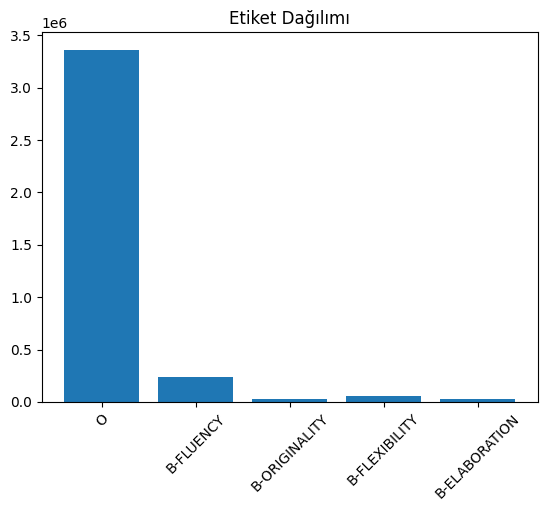

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

all_labels = [tag for sublist in df_sozler1["ner_tags"] for tag in sublist]
label_counts = Counter(all_labels)

plt.bar(label_counts.keys(), label_counts.values())
plt.title("Etiket Dağılımı")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from collections import Counter

all_labels = [tag for tags in df_sozler1["ner_tags"] for tag in tags]
label_counts = Counter(all_labels)

for label, count in label_counts.items():
    print(f"{label}: {count}")


O: 3360000
B-FLUENCY: 240000
B-ORIGINALITY: 30000
B-FLEXIBILITY: 60000
B-ELABORATION: 30000


In [ ]:
import pandas as pd

# Etikete göre filtre fonksiyonu
def filter_by_label(df, label):
    return df[df["ner_tags"].apply(lambda tags: label in tags)]

# Her sınıf için veri alt kümesi oluştur
df_fluency = filter_by_label(df_sozler1, "B-FLUENCY")
df_flexibility = filter_by_label(df_sozler1, "B-FLEXIBILITY")
df_originality = filter_by_label(df_sozler1, "B-ORIGINALITY")
df_elaboration = filter_by_label(df_sozler1, "B-ELABORATION")
df_o = filter_by_label(df_sozler1, "O")

# Her sınıftan 30,000 örnek al
min_count = 50000
df_fluency = df_fluency.sample(n=min_count, random_state=42)
df_flexibility = df_flexibility.sample(n=min_count, random_state=42)
df_originality = df_originality.sample(n=min_count, random_state=42)
df_elaboration = df_elaboration.sample(n=min_count, random_state=42)
df_o = df_o.sample(n=min_count, random_state=42)

# Hepsini birleştir
df_equalized = pd.concat([
    df_fluency,
    df_flexibility,
    df_originality,
    df_elaboration,
    df_o
]).sample(frac=1, random_state=42).reset_index(drop=True)  # Karıştır

# Son kontrol
from collections import Counter
all_labels = [tag for tags in df_equalized["ner_tags"] for tag in tags]
label_counts = Counter(all_labels)
print("Yeni etiket dağılımı:")
for label, count in label_counts.items():
    print(f"{label}: {count}")



Yeni etiket dağılımı:
O: 1691418
B-FLEXIBILITY: 45794
B-FLUENCY: 138736
B-ORIGINALITY: 37964
B-ELABORATION: 33036


In [ ]:
from collections import defaultdict
import random

# Token bazlı veri tut
balanced_tokens = defaultdict(list)

# Satırları gez
for _, row in df_sozler1.iterrows():
    tokens = row["Lemma"]
    tags = row["ner_tags"]
    for token, tag in zip(tokens, tags):
        if tag.startswith("B-") or tag == "O":  # Sadece B- ve O etiketliler
            balanced_tokens[tag].append((token, tag))

# Her sınıfın kaç token içerdiğini göster
for tag in balanced_tokens:
    print(f"{tag}: {len(balanced_tokens[tag])}")

# Eşitlenecek sayı
min_count = min(len(balanced_tokens[tag]) for tag in ["B-FLUENCY", "B-FLEXIBILITY", "B-ORIGINALITY", "B-ELABORATION", "O"])
print(f"\nHer etiketten alınacak token sayısı: {min_count}")

# Rastgele örnekle
equalized_data = []
for tag in ["B-FLUENCY", "B-FLEXIBILITY", "B-ORIGINALITY", "B-ELABORATION", "O"]:
    sampled = random.sample(balanced_tokens[tag], min_count)
    equalized_data.extend(sampled)

# Karıştır
random.shuffle(equalized_data)

# Sonuçları ayrı listelere ayır
tokens_only = [t for t, l in equalized_data]
labels_only = [l for t, l in equalized_data]

# Kontrol
from collections import Counter
print("\nYeni etiket dağılımı (token bazlı):")
print(Counter(labels_only))



O: 3360000
B-FLUENCY: 240000
B-ORIGINALITY: 30000
B-FLEXIBILITY: 60000
B-ELABORATION: 30000

Her etiketten alınacak token sayısı: 30000

Yeni etiket dağılımı (token bazlı):
Counter({'B-FLUENCY': 30000, 'B-ELABORATION': 30000, 'B-FLEXIBILITY': 30000, 'B-ORIGINALITY': 30000, 'O': 30000})


In [ ]:
from datasets import Dataset

hf_dataset = Dataset.from_dict({
    "tokens": [[t] for t in tokens_only],
    "ner_tags": [[label] for label in labels_only]
})


In [ ]:
hf_dataset

Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 150000
})

In [ ]:
from datasets import Dataset

# Her 10 token = 1 örnek kabul
chunk_size = 10
token_chunks = [tokens_only[i:i+chunk_size] for i in range(0, len(tokens_only), chunk_size)]
label_chunks = [labels_only[i:i+chunk_size] for i in range(0, len(labels_only), chunk_size)]

# Eşit uzunluktalar mı kontrol
assert len(token_chunks) == len(label_chunks)

# HuggingFace Dataset'e çevir
dataset_dict = {
    "tokens": token_chunks,
    "ner_tags": label_chunks
}

dataset = Dataset.from_dict(dataset_dict)
dataset = dataset.shuffle(seed=42)

# İlk örneğe göz atalım
print(dataset[0])


{'tokens': ['logic', 'inform', 'think', 'think', 'logic', 'part', 'think', 'think', 'logic', 'logic'], 'ner_tags': ['B-ELABORATION', 'O', 'B-FLUENCY', 'B-FLUENCY', 'B-ELABORATION', 'O', 'B-FLUENCY', 'B-FLUENCY', 'B-ELABORATION', 'B-ELABORATION']}


In [ ]:
label_list = ["O", "B-FLUENCY", "B-FLEXIBILITY", "B-ORIGINALITY", "B-ELABORATION"]
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}


In [ ]:
!pip install transformers datasets seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=0ef1bf7683cca8f903d4cbda8411b35af7909b77cd631c9c98cf7d606ff50489
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

model = AutoModelForTokenClassification.from_pretrained(
    model_ckpt,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label2id[label[word_idx]])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True)


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

In [ ]:
!pip install evaluate
import evaluate
import numpy as np

seqeval = evaluate.load("seqeval")

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [id2label[p] for (p, l) in zip(pred, lab) if l != -100]
        for pred, lab in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (p, l) in zip(pred, lab) if l != -100]
        for pred, lab in zip(predictions, labels)
    ]
    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"]
    }


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.6 MB/s eta 0:00:00


In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorForTokenClassification

args = TrainingArguments(
    output_dir="./ner_model",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01
)

data_collator = DataCollatorForTokenClassification(tokenizer)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset.select(range(1000)),  # küçük bir subset ile test
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-49-5831947e3771>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.000000,0.000001,1.000000,1.000000,1.000000,1.000000
2,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.000001,1.000000,1.000000,1.000000,1.000000
4,0.000200,0.000001,1.000000,1.000000,1.000000,1.000000
5,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
7,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
8,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
9,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
10,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=9380, training_loss=3.076574957842302e-05, metrics={'train_runtime': 773.1821, 'train_samples_per_second': 194.003, 'train_steps_per_second': 12.132, 'total_flos': 1373151699379200.0, 'train_loss': 3.076574957842302e-05, 'epoch': 10.0})

In [ ]:
# Eğitilen modeli kaydet
trainer.save_model("./ner_creative_model")
tokenizer.save_pretrained("./ner_creative_model")


('./ner_creative_model/tokenizer_config.json',
 './ner_creative_model/special_tokens_map.json',
 './ner_creative_model/vocab.txt',
 './ner_creative_model/added_tokens.json',
 './ner_creative_model/tokenizer.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
import torch

# Model ve tokenizer'ı yüklüyoruz
model_path = "./ner_creative_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForTokenClassification.from_pretrained(model_path)

# Etiket eşleşmeleri
id2label = model.config.id2label


In [ ]:
# 🎨 Renk tanımları
color_map = {
    "B-FLUENCY": "\033[94m",      # Mavi
    "B-FLEXIBILITY": "\033[95m",  # Mor
    "B-ORIGINALITY": "\033[92m",  # Yeşil
    "B-ELABORATION": "\033[93m",  # Sarı
    "O": "\033[0m",               # Normal (renksiz)
}
reset = "\033[0m"

# ✏️ Cümle
sentence = "Creative students develop multiple ideas and describe them clearly because they think differently"

# 🔁 Tokenize
inputs = tokenizer(sentence, return_tensors="pt", truncation=True)
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# 🧠 Tahmin
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=2)

# 🔍 Etiketleri çözümle
predicted_labels = [id2label[pred.item()] for pred in predictions[0]]

# 🌈 Renkli çıktı
for token, label in zip(tokens, predicted_labels):
    if token not in tokenizer.all_special_tokens:
        color = color_map.get(label, "\033[0m")
        print(f"{color}{token:15} → {label}{reset}")


creative        → O
students        → O
develop         → B-FLUENCY
multiple        → O
ideas           → B-FLUENCY
and             → O
describe        → O
them            → O
clearly         → O
because         → O
they            → O
think           → B-FLUENCY
differently     → O
